/tmp/ipykernel_75013/836129267.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Hour'] = df_filtered.index.hour


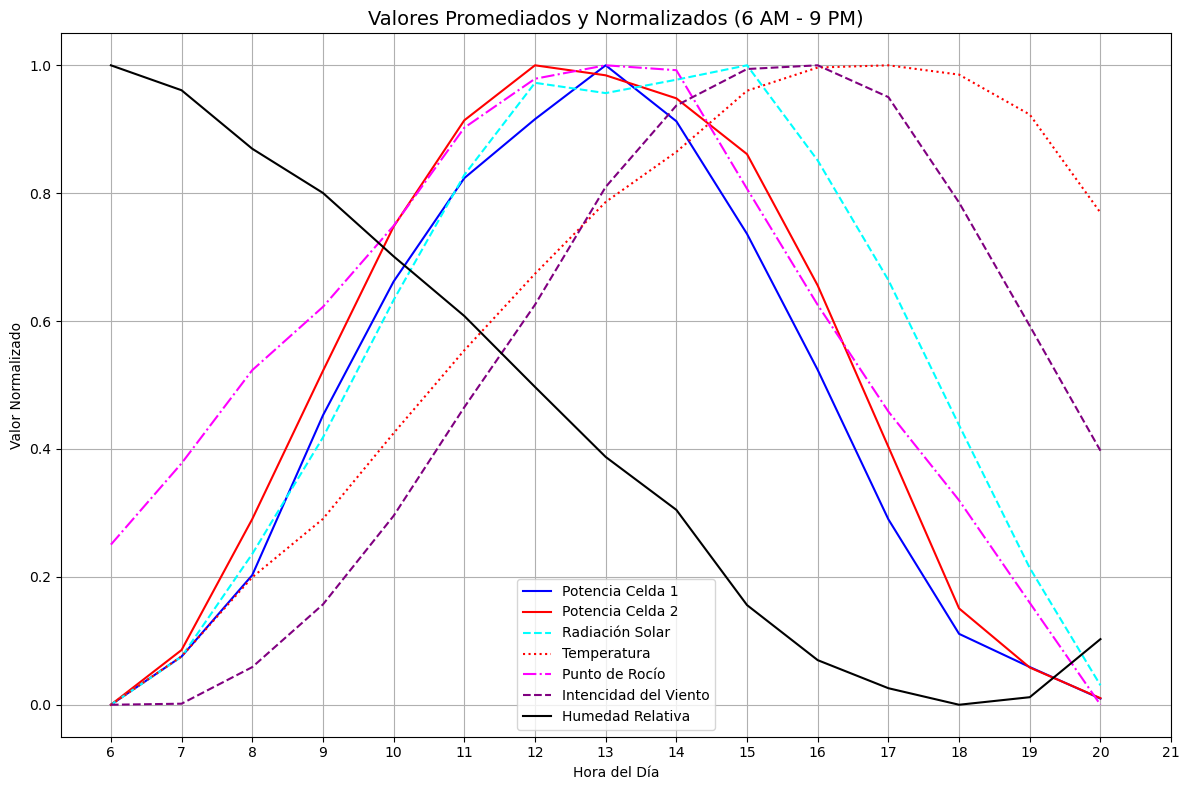

In [1]:
########## FIGURA : PROMEDIO HORA DEL DIA, variables meteo + [potencias celdas], NORMALIZADA 
### la normalizacion es (min-max normalization) para las variables


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


df = pd.read_pickle("Met-PV_params.pkl")

# Calcular LA POTENCIA
df['Power'] = ((df['PCE_up'] + df['PCE_dw']) / 2) * df['SolarRad']


# Filtrar el DataFrame entre las 6 AM y 9 PM
df_filtered = df.between_time('06:00', '21:00')

# Extraer la hora del index para agrupar los datos por hora
df_filtered['Hour'] = df_filtered.index.hour

# Separar por celda (celda 1 y celda 2)
df_cell_1 = df_filtered[df_filtered['Celda'] == 1]
df_cell_2 = df_filtered[df_filtered['Celda'] == 2]

# Agrupar los datos por hora y calcular el promedio para cada celda
df_cell_1_avg = df_cell_1.groupby('Hour')[['Power', 'SolarRad', 'Temperature', 'DewPoint', 'WindSpeed', 'rh']].mean()
df_cell_2_avg = df_cell_2.groupby('Hour')[['Power', 'SolarRad', 'Temperature', 'DewPoint', 'WindSpeed', 'rh']].mean()

# Normalizar las columnas entre 0 y 1 (min-max normalization) para las variables
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# seleccionamos las columnas a normalizar
columns = ['Power', 'SolarRad', 'Temperature', 'DewPoint', 'WindSpeed', 'rh']

# Normalizar las variables 
for column in columns:
    df_cell_1_avg[column] = normalize(df_cell_1_avg[column])
    df_cell_2_avg[column] = normalize(df_cell_2_avg[column])



######### GENERAMOS LA GRAFICA:


plt.figure(figsize=(12, 8))

# Grafica POTENCIAS
plt.plot(df_cell_1_avg.index, df_cell_1_avg['Power'], label='Potencia Celda 1', color='blue')
plt.plot(df_cell_2_avg.index, df_cell_2_avg['Power'], label='Potencia Celda 2', color='red')

# Graficar  VARIABLES METEO
plt.plot(df_cell_1_avg.index, df_cell_1_avg['SolarRad'], label='Radiación Solar', color='cyan', linestyle='--')
plt.plot(df_cell_1_avg.index, df_cell_1_avg['Temperature'], label='Temperatura', color='red', linestyle=':')
plt.plot(df_cell_1_avg.index, df_cell_1_avg['DewPoint'], label='Punto de Rocío', color='magenta', linestyle='-.')
plt.plot(df_cell_1_avg.index, df_cell_1_avg['WindSpeed'], label='Intencidad del Viento', color='purple', linestyle='--')
plt.plot(df_cell_1_avg.index, df_cell_1_avg['rh'], label='Humedad Relativa', color='black', linestyle='-')

# PARAMETOS DE LA GRAFICA
plt.title('Valores Promediados y Normalizados (6 AM - 9 PM)', fontsize=14)
plt.xlabel('Hora del Día')
plt.ylabel('Valor Normalizado')
plt.xticks(np.arange(6, 22, 1))  #horas entre 6 AM y 9 PM
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.tight_layout()
plt.show()


In [ ]:
## CREAMOS DF CON PKL COMPLETO ( meteo + celdas )

import pandas as pd
df = pd.read_pickle('Met-PV_params.pkl')
#print(df.columns)

### Calcular la potencia para cada celda,

# calculo de potencia
df['Power'] = ((df['PCE_up'] + df['PCE_dw']) / 2) * df['SolarRad']

# Separar los datos por tipo de celda,(un df por celda)
cell_tipo_1 = df[df['Celda'] == 1]
cell_tipo_2 = df[df['Celda'] == 2]

# Calcular las potencias normalizadas
cell_tipo_1['Normalized_Power'] = cell_tipo_1['Power'] / cell_tipo_1['Power'].max()
cell_tipo_2['Normalized_Power'] = cell_tipo_2['Power'] / cell_tipo_2['Power'].max()

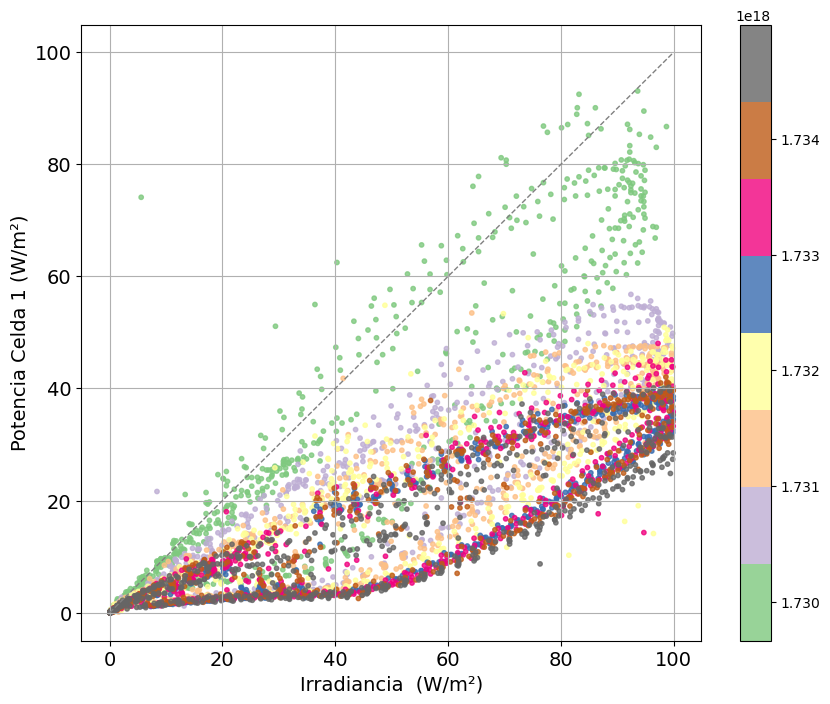

In [3]:
######## FIGURA: SCATTER POTENCIA vs IRRADIANCIA  
# La potencia ('Power') se calcula como la multiplicacion del promedio entre PCE_up y PCE_dw, con la irraciancia SolarRad 

import pandas as pd
import matplotlib.pyplot as plt

'''
###  Cargar datos, Calculo de Potencia

# Cargar el archivo .pkl
df = pd.read_pickle("Met-PV_params.pkl")

### Calcular la potencia para cada celda,

# calculo de potencia
df['Power'] = ((df['PCE_up'] + df['PCE_dw']) / 2) * df['SolarRad']

# Separar los datos por tipo de celda,(un df por celda)
cell_tipo_1 = df[df['Celda'] == 1]
cell_tipo_2 = df[df['Celda'] == 2]
'''

######### GENERAR  SCATTER 
#### CELDA tipo 1

# Crear el scatter 
plt.figure(figsize=(10, 8))
#plt.scatter(cell_tipo_1['SolarRad'], cell_tipo_1['Power'], alpha=0.7, color = 'purple') # c=cell_tipo_1.index.values, s= 0.5)

plt.scatter(cell_tipo_1['SolarRad'], cell_tipo_1['Power'], alpha=0.8,  c=cell_tipo_1.index.values, cmap = 'Accent',s=10)
plt.plot([0, max(cell_tipo_1['Power'].max(), cell_tipo_1['SolarRad'].max())], 
         [0, max(cell_tipo_1['Power'].max(), cell_tipo_1['SolarRad'].max())], 
         color='gray', linestyle='--', linewidth=1)  # Línea diagonal

# Configurar el gráfico
#plt.title("Potencia Celda 1 vs Irradiancia")
plt.ylabel("Potencia Celda 1 (W/m²)", fontsize = 14)
plt.xlabel("Irradiancia  (W/m²)", fontsize = 14)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14)
plt.colorbar()
plt.grid(True)
plt.show()

### comentarios de reunion:
### corregir los limites de los datos, (eliminar los que no tengan datos)
### leyenda de la barra. con intervalo de semanas

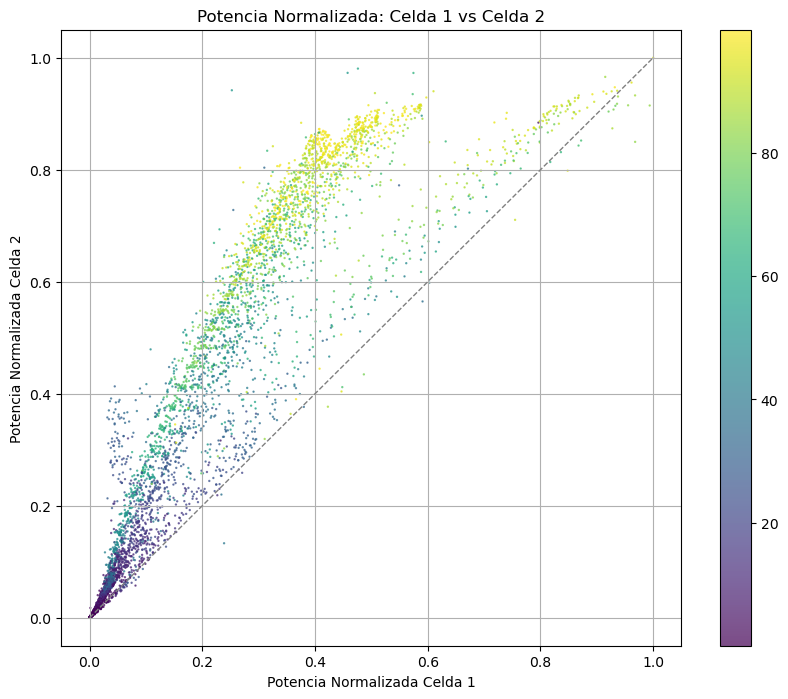

In [4]:
######## FIGURA: SCATTER POTENCIA CELDA 1 vs POTENCIA CELDA 2 , NORMALIZADA.
### la normalizacion de las series de tiempo se calcula dividiendo por el valor maximo de la serie.

import pandas as pd
import matplotlib.pyplot as plt


# Crear el scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(cell_tipo_1['Normalized_Power'], cell_tipo_2['Normalized_Power'], alpha=0.7, c= cell_tipo_1['SolarRad'], s= 0.5)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1)  # Línea diagonal

# Configurar el gráfico
plt.title("Potencia Normalizada: Celda 1 vs Celda 2")
plt.xlabel("Potencia Normalizada Celda 1")
plt.ylabel("Potencia Normalizada Celda 2")
plt.colorbar()
plt.grid(True)
plt.show()




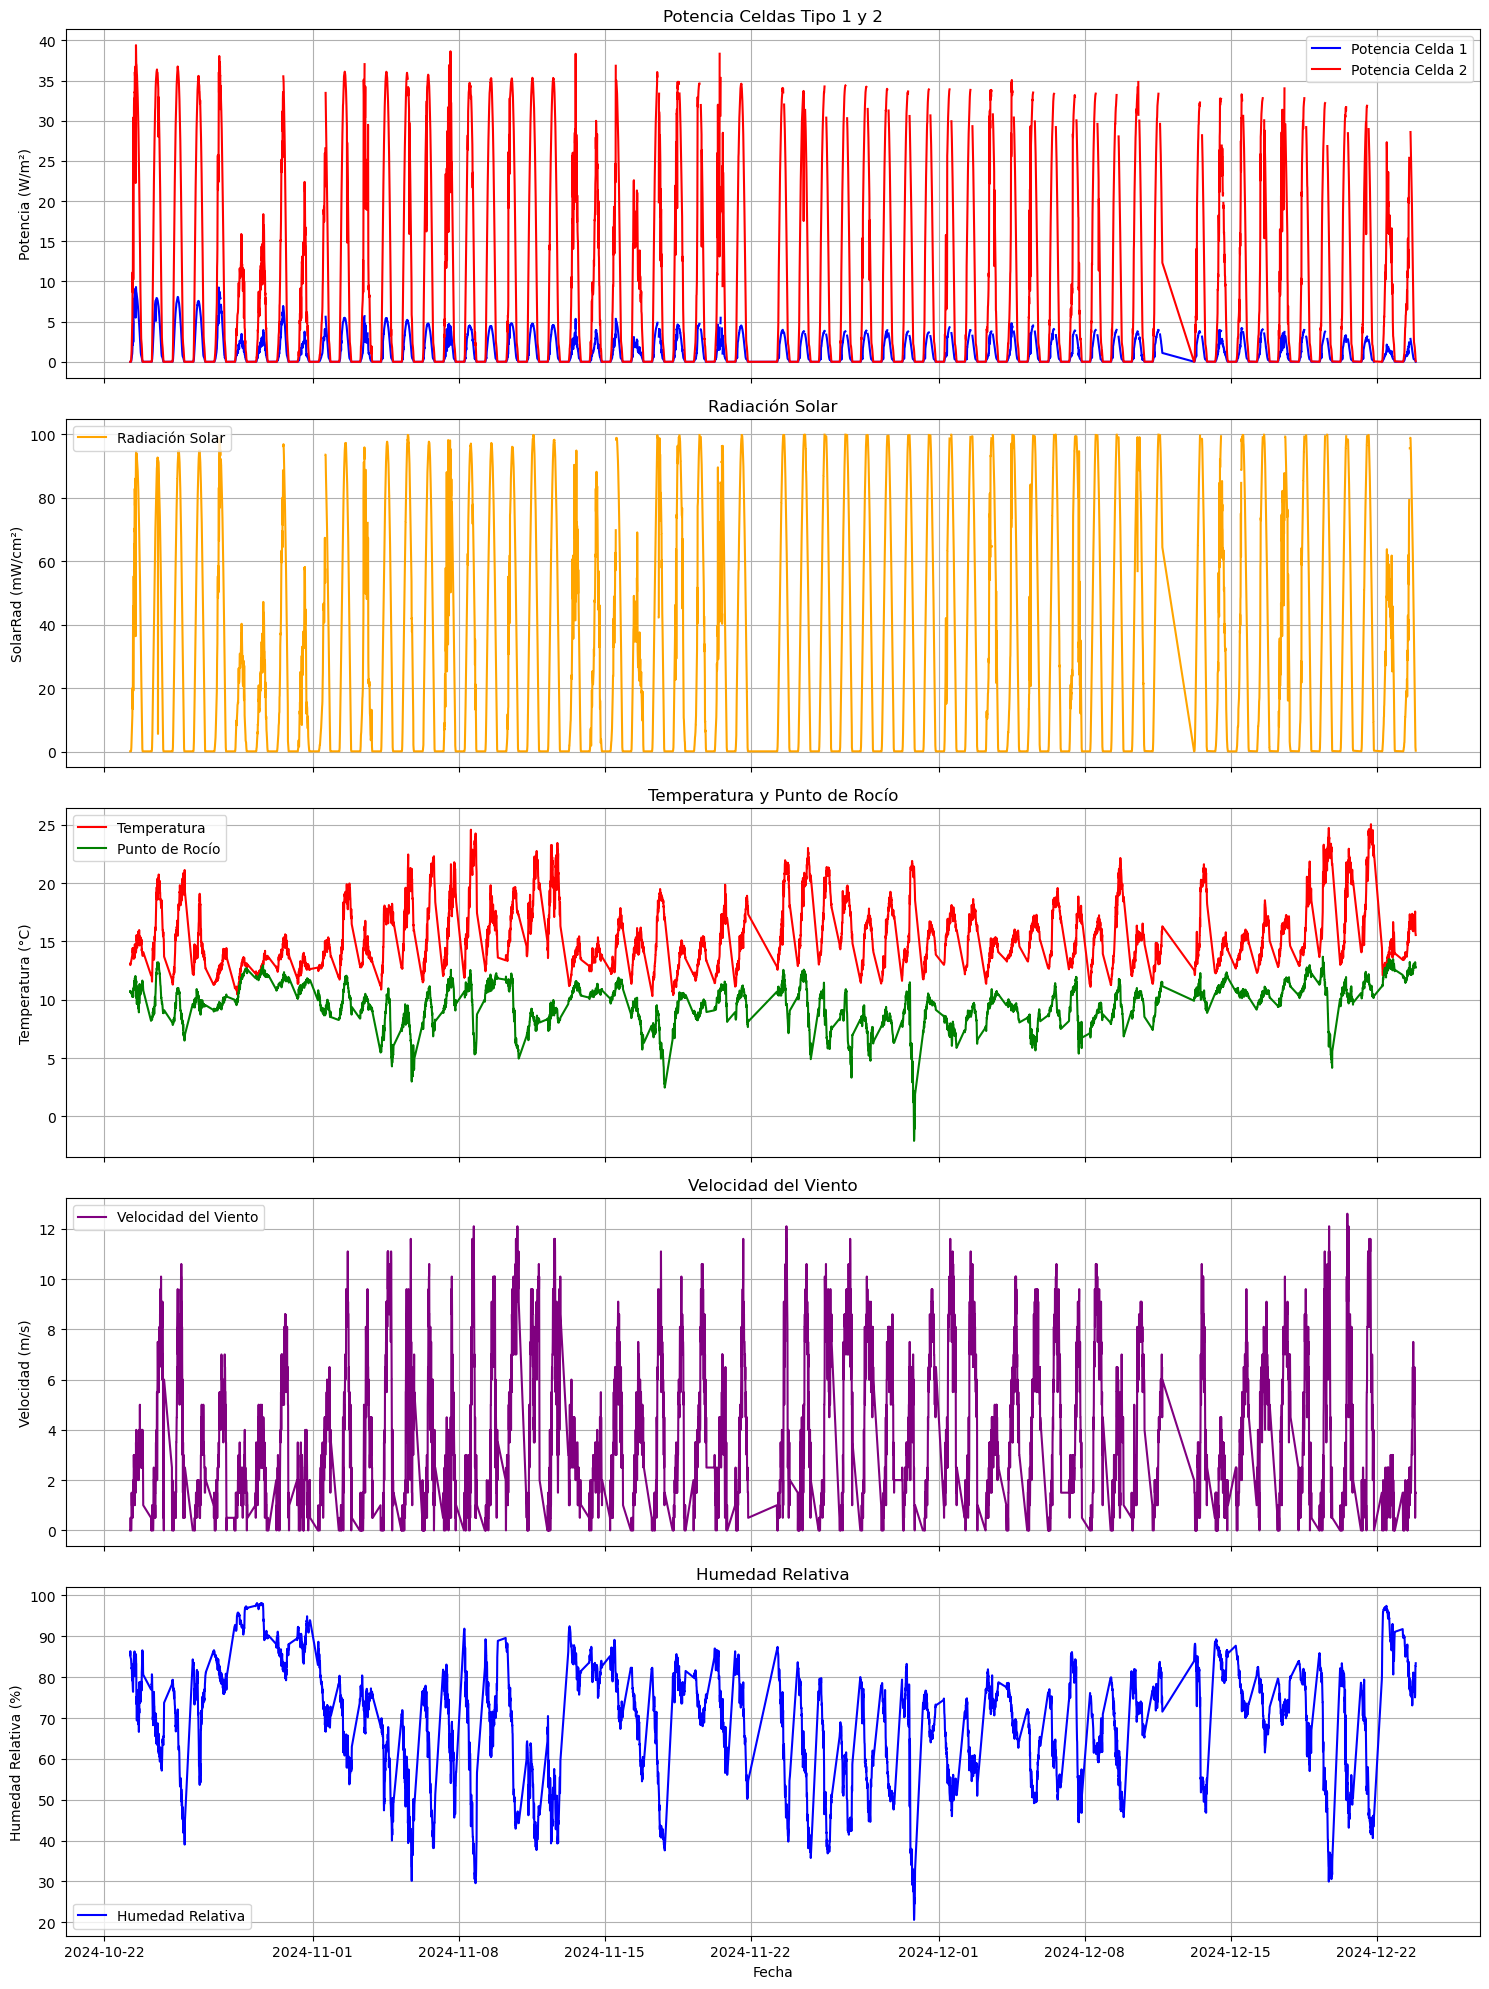

In [2]:
########### FIGURA SERIES DE TIEMPO, PERIODO COMPLETO, POTENCIA + VARIABLES METEO.


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_pickle("Met-PV_params.pkl")

# Calcular la potencia 
df['Power'] = ((df['PCE_up'] + df['PCE_dw']) / 2) * df['SolarRad']

cell_type_1 = df[df['Celda'] == 1]
cell_type_2 = df[df['Celda'] == 2]

# Crear la figura con subplots
fig, axes = plt.subplots(5, 1, figsize=(15, 20), sharex=True)

# 1. Graficar la potencia para las celdas tipo 1 y tipo 2
axes[0].plot(cell_type_1.index, cell_type_1['Power']/10, label='Potencia Celda 1', color='blue')
axes[0].plot(cell_type_2.index, cell_type_2['Power']/10, label='Potencia Celda 2', color='red')
axes[0].set_ylabel('Potencia (W/m²)')
axes[0].set_title('Potencia Celdas Tipo 1 y 2')
axes[0].legend()
axes[0].grid()

# 2. Graficar SolarRad para ambas celdas
axes[1].plot(df.index, df['SolarRad'], label='Radiación Solar', color='orange')
axes[1].set_ylabel('SolarRad (mW/cm²)')
axes[1].set_title('Radiación Solar')
axes[1].legend()
axes[1].grid()

# 3. Graficar Temperatura y Punto de Rocío
axes[2].plot(df.index, df['Temperature'], label='Temperatura', color='red')
axes[2].plot(df.index, df['DewPoint'], label='Punto de Rocío', color='green')
axes[2].set_ylabel('Temperatura (°C)')
axes[2].set_title('Temperatura y Punto de Rocío')
axes[2].legend()
axes[2].grid()

# 4. Graficar Velocidad del Viento
axes[3].plot(df.index, df['WindSpeed'], label='Velocidad del Viento', color='purple')
axes[3].set_ylabel('Velocidad (m/s)')
axes[3].set_title('Velocidad del Viento')
axes[3].legend()
axes[3].grid()

# 5. Graficar Humedad Relativa
axes[4].plot(df.index, df['rh'], label='Humedad Relativa', color='blue')
axes[4].set_ylabel('Humedad Relativa (%)')
axes[4].set_title('Humedad Relativa')
axes[4].legend()
axes[4].grid()

# Ajustar el diseño
plt.xlabel('Fecha')
plt.tight_layout()

# Mostrar la figura
plt.show()
